# Перевести ваш спарсенный json в формат csv таблицу через pandas
# Для hh.ru:
#   Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)
#   Какая средняя и медианная зарплата по группам вакансий?
#   Какая средняя и медианная зарплата по каждому региону?
#   Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?
#   Какое процентное соотношение каждого региона по вакансиям от всех вакансий?
#   Какая корреляция уровня опыта от зарплаты?
#   Сколько должностей в наборе данных?
#   Какие 10 наиболее часто встречающихся должностей?

In [1]:
import json
import pandas as pd
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Перевести ваш спарсенный json в формат csv таблицу через pandas
with open("./data.json", "r",encoding='utf8') as file:
    data = json.load(file)
data_list = []
for i in data['data']:
    data_list.append([i['title'],i['work experience'],i['salary'],i['region']])
df = pd.DataFrame(data_list, columns=data['data'][0].keys())
df.to_csv('./data.csv')

In [3]:
# Сгруппируйте вакансии по направлениями (DS, DE, Software Engenering, etc.)
# direction
def search(strings):
    result = []
    for string in strings:       
        if string.upper().find('SOFTWARE')>-1: result.append('SOFTWARE')
        elif string.find('ПО')>-1: result.append('SOFTWARE')
        elif string.upper().find('ENGENERING')>-1: result.append('ENGENERING')
        elif string.upper().find('ИНЖЕНЕР')>-1: result.append('ENGENERING')
        elif string.upper().find('ENGENEER')>-1: result.append('ENGENERING')
        elif string.upper().find('BACKEND')>-1: result.append('BACKEND')
        elif string.upper().find('BACK-END')>-1: result.append('BACKEND')
        elif string.upper().find('FRONTEND')>-1: result.append('FRONTEND')
        elif string.upper().find('FRONT-END')>-1: result.append('FRONTEND')
        elif string.upper().find('FULLSTACK')>-1: result.append('FULLSTACK')
        elif string.upper().find('FULL-STACK')>-1: result.append('FULLSTACK')
        elif string.upper().find('FULL STACK')>-1: result.append('FULLSTACK')
        elif string.upper().find('DEVOPS')>-1: result.append('DEVOPS')
        elif string.upper().find('SECURITY')>-1: result.append('SECURITY')
        elif string.upper().find('TEAMLEAD')>-1: result.append('TEAMLEAD')
        elif string.upper().find('TEAM LEAD')>-1: result.append('TEAMLEAD')
        elif string.upper().find('JUNIOR')>-1: result.append('JUNIOR')
        elif string.upper().find('MIDDLE')>-1: result.append('MIDDLE')
        elif string.upper().find('SENIOR')>-1: result.append('SENIOR')
        elif string.upper().find('HADOOP')>-1: result.append('HADOOP')
        elif string.upper().find('ETL')>-1: result.append('ETL')
        elif string.upper().find('ELT')>-1: result.append('ELT')
        elif string.upper().find('WEB')>-1: result.append('WEB')
        elif string.upper().find('QA')>-1: result.append('QA')
        elif string.upper().find('DS')>-1: result.append('DS')
        elif string.upper().find('DE')>-1: result.append('DE')
        elif string.upper().find('BI')>-1: result.append('BI')
        elif string.upper().find('LINUX')>-1: result.append('LINUX')
        elif string.upper().find('QLIKVIEW')>-1: result.append('QLIKVIEW')
        elif string.upper().find('JAVA')>-1: result.append('JAVA')
        elif string.upper().find('PHP')>-1: result.append('PHP')
        elif string.upper().find('JS')>-1: result.append('JS')
        elif string.upper().find('PYTHON')>-1: result.append('PYTHON')
        else: result.append('OTHER')
    return pd.Series(result)

In [4]:
df1 = df.assign(direction = lambda x: search(x.title))
df1.groupby('direction').count()

,title,work experience,salary,region
direction,,,,
BACKEND,171,171,171,171
BI,39,39,39,39
DE,192,192,192,192
DEVOPS,74,74,74,74
DS,3,3,3,3
ENGENERING,173,173,173,173
ETL,16,16,16,16
FRONTEND,15,15,15,15
FULLSTACK,63,63,63,63


In [5]:
# Какая средняя и медианная зарплата по группам вакансий?
def replace_salary(salarys):
    result = []
    for salary in salarys:       
        ss = salary.split(' ')
        sal = nan
        if len(ss)>=2:
            sal = int(''.join([i for i in ss[1] if i.isdigit()]))
        result.append(sal)
    return pd.Series(result)

In [6]:
df2 = df1.assign(salary = lambda x: replace_salary(x.salary))
df2[['direction','salary']].groupby('direction').mean()
df2[['direction','salary']].groupby('direction').median()
df3 = pd.concat([
    df2[['direction','salary']].groupby('direction').mean(),
    df2[['direction','salary']].groupby('direction').median()
],axis=1,ignore_index=True)
df3.rename(columns={0: 'salary_mean', 1: 'salary_median'}, inplace=True)
df3

,salary_mean,salary_median
direction,,
BACKEND,137500.000000,120000.0
BI,156666.666667,190000.0
DE,116833.333333,100000.0
DEVOPS,157950.000000,160000.0
DS,NaN,NaN
ENGENERING,115445.945946,100000.0
ETL,140000.000000,140000.0
FRONTEND,93750.000000,82500.0
FULLSTACK,126675.000000,150000.0


In [7]:
# Какая средняя и медианная зарплата по каждому региону?
# df2[['region','salary']]
df4 = pd.concat([
    df2[['region','salary']].groupby('region').mean(),
    df2[['region','salary']].groupby('region').median()
],axis=1,ignore_index=True)
df4.rename(columns={0: 'salary_mean', 1: 'salary_median'}, inplace=True)
df4

,salary_mean,salary_median
region,,
,348920.731707,115000.0
Абхазия,NaN,NaN
Аксай (Казахстан),NaN,NaN
Алматы,95583.333333,4500.0
"Алматы, Байконур, Драмтеатр имени Ауэзова",NaN,NaN
...,...,...
Череповец,NaN,NaN
Черноголовка,170000.000000,170000.0
Черногория,NaN,NaN


In [8]:
# Какая самая высокооплачиваемая из групп вакансий, исходя из их средних зарплат?
df2[['direction','salary']].groupby('direction').mean().idxmax(axis=0)

salary    PYTHON
dtype: object

In [9]:
# Какое процентное соотношение каждого региона по вакансиям от всех вакансий?
df5 = df[['region']]
df5.insert(1,'count',1)
df5 = df5.groupby('region').count()
df5.assign(count = lambda x: x['count']/(df[['region']].shape[0]/100))

,count
region,
,43.20
Абхазия,0.05
Аксай (Казахстан),0.05
Алматы,1.45
"Алматы, Байконур, Драмтеатр имени Ауэзова",0.05
...,...
Череповец,0.05
Черноголовка,0.05
Черногория,0.10


In [10]:
# Какая корреляция уровня опыта от зарплаты?
def replace_experience(experiences):
    result = []
    for experience in experiences:       
        if experience == 'не требуется': result.append(0)
        elif experience == '1–3 года': result.append(1)
        elif experience == '3–6 лет': result.append(3)
        elif experience == 'более 6 лет': result.append(6)
        else: result.append(nan)
    return pd.Series(result)

<AxesSubplot: xlabel='experience', ylabel='salary'>

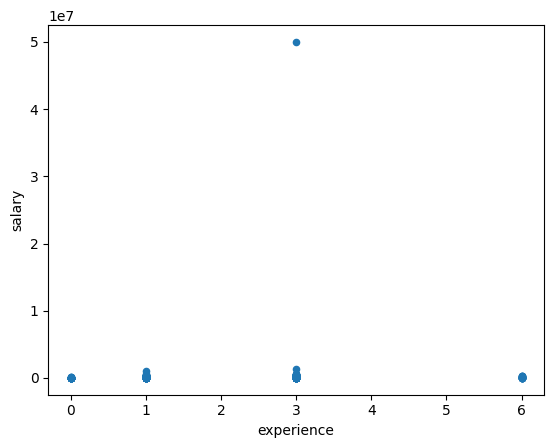

In [49]:
df6 = df.assign(experience = lambda x: replace_experience(x['work experience']))
df6 = df6.assign(salary = lambda x: replace_salary(x['salary']))
df7 = pd.DataFrame({
    'experience': df6.experience,
    'salary': df6.salary
})
df7.plot.scatter(x='experience',y='salary')
#Сильные выбросы по 3 году

<AxesSubplot: xlabel='experience', ylabel='salary'>

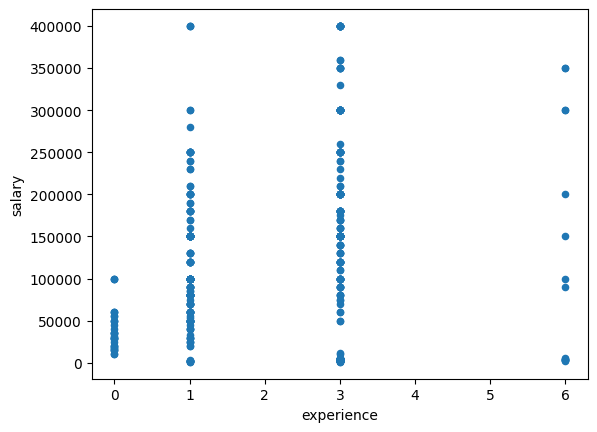

In [54]:
#Отсечём зарплаты выше пол миллиона
df7 = df7.loc[df7['salary'] <= 500000]
df7.plot.scatter(x='experience',y='salary')

In [76]:
# Сколько должностей в наборе данных?
df[df['title'].str.contains("набор")]
# В наборе данных в моём датасете никого нет. Вместо этого покажу сколько людей впринципе работает с данными.

,title,work experience,salary,region


In [89]:
df8 = df[df['title'].str.contains("данны")]
len(df8)

33

In [101]:
# Какие 10 наиболее часто встречающихся должностей?
df9 = df1[['title','region']].groupby('title').count()
df9.rename(columns={'region': 'count'}, inplace=True)
df9 = df9.sort_values(by=['count'],ascending=False)
df9.head(10)

,count
title,
Python Developer,41
Программист Python,39
Разработчик Python,37
Python разработчик,29
Python developer,25
Инженер-программист,23
Python-разработчик,22
Senior/Lead Python-разработчик,18
Middle Python Developer,17
